#**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Data = pd.read_csv('/content/drive/MyDrive/House Sale Data/Processed_Housing_Data.csv')

In [ ]:
Data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Basement Area (in Sqft),Latitude,Longitude,...,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9,Transformed Flat Area,Transformed Area of House from Basement,Transformed Living Area,House_age_new,House_age_old,House_age_very old,luxury_home
0,221900.0,3,1.00,5650.0,1.0,0,7,0,47.5112,-122.257,...,0,0,0,7.073270,7.073270,7.200425,0,0,1,0
1,538000.0,3,2.25,7242.0,2.0,0,7,400,47.7210,-122.319,...,0,0,0,7.851661,7.682482,7.432484,0,0,1,0
2,180000.0,2,1.00,10000.0,1.0,0,6,0,47.7379,-122.233,...,0,0,0,6.646391,6.646391,7.908387,0,0,1,0
3,604000.0,4,3.00,5000.0,1.0,0,7,910,47.5208,-122.393,...,0,0,0,7.580700,6.956545,7.215240,0,0,1,0
4,510000.0,3,2.00,8080.0,1.0,0,8,0,47.6168,-122.045,...,0,0,0,7.426549,7.426549,7.495542,0,1,0,0


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 34 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Sale_Price                               21609 non-null  float64
 1   No of Bedrooms                           21609 non-null  int64  
 2   No of Bathrooms                          21609 non-null  float64
 3   Lot Area (in Sqft)                       21609 non-null  float64
 4   No of Floors                             21609 non-null  float64
 5   No of Times Visited                      21609 non-null  int64  
 6   Overall Grade                            21609 non-null  int64  
 7   Basement Area (in Sqft)                  21609 non-null  int64  
 8   Latitude                                 21609 non-null  float64
 9   Longitude                                21609 non-null  float64
 10  Lot Area after Renovation (in Sqft)      21609

#**Feature Scaling of Data**

The variables are scaled to have similar magnitude and ranges so that model is not biased towards a particular variable

Types:

1) Standardisation :

Rescales the feature values so that they have the properties of Standard Normal Distribution with mean as 0 and standard deviation of 1

2) Min Max Scaling:

simplest method for scaling and value range for the transformed variables between [0,1]

3) Normalization:

The range is fixed from -1 to 1 (also called mean normalization)

#**For Linear Regression Standardization should be used because the model assumes the input variables to be normally distributed**

#**STEP:1 Separate Dependent and Independent variables:**

In [ ]:
Y = Data['Sale_Price']  # Dependent variable
X = Data.iloc[:, 1:34]  # Independent variables

#**STEP:2 Split the data into Training and Tesing sets**

70-30 split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)


#**STEP: 3 Scale the Training Data**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# **STEP 4: Calculate VIF on the Scaled Training Data**

In [ ]:
vif_data = pd.DataFrame(X_train_scaled, columns=X_train.columns)
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index=vif_data.columns)


In [ ]:
print("VIF values:\n", VIF)

VIF values:
 No of Bedrooms                               1.757019
No of Bathrooms                              3.234175
Lot Area (in Sqft)                           2.320870
No of Floors                                 2.241957
No of Times Visited                          1.444946
Overall Grade                                3.267462
Basement Area (in Sqft)                      8.475546
Latitude                                     2.495092
Longitude                                    1.697128
Lot Area after Renovation (in Sqft)          2.354320
Years Since Renovation                       2.792848
Condition_of_the_House_Excellent            45.399807
Condition_of_the_House_Fair                139.321634
Condition_of_the_House_Good                118.046580
Condition_of_the_House_Okay                  6.051686
Ever_Renovated_Yes                           2.914302
Waterfront_View_Yes                          1.195154
Zipcode_Group_Zipcode_Group_1                1.541110
Zipcode_Group_Z

#**STEP:5 Calculate VIF on scaled training data and remove variables with VIF > 5**

In [ ]:
vif_data = pd.DataFrame(X_train_scaled, columns=X_train.columns)

def calculate_vif(vif_data):
    return pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])],
                     index=vif_data.columns)

VIF = calculate_vif(vif_data)

while VIF.max() > 5:
    max_vif_column = VIF.idxmax()
    print(f"Dropping '{max_vif_column}' with VIF: {VIF.max()}")
    vif_data = vif_data.drop(columns=[max_vif_column])
    VIF = calculate_vif(vif_data)


Dropping 'House_age_new' with VIF: inf
Dropping 'Condition_of_the_House_Fair' with VIF: 139.32163388757849
Dropping 'Transformed Flat Area' with VIF: 32.873613540899385
Dropping 'House_age_very old' with VIF: 6.421902064260833


In [ ]:
print("Remaining variables after VIF filtering:\n", vif_data.columns)

Remaining variables after VIF filtering:
 Index(['No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)',
       'No of Floors', 'No of Times Visited', 'Overall Grade',
       'Basement Area (in Sqft)', 'Latitude', 'Longitude',
       'Lot Area after Renovation (in Sqft)', 'Years Since Renovation',
       'Condition_of_the_House_Excellent', 'Condition_of_the_House_Good',
       'Condition_of_the_House_Okay', 'Ever_Renovated_Yes',
       'Waterfront_View_Yes', 'Zipcode_Group_Zipcode_Group_1',
       'Zipcode_Group_Zipcode_Group_2', 'Zipcode_Group_Zipcode_Group_3',
       'Zipcode_Group_Zipcode_Group_4', 'Zipcode_Group_Zipcode_Group_5',
       'Zipcode_Group_Zipcode_Group_6', 'Zipcode_Group_Zipcode_Group_7',
       'Zipcode_Group_Zipcode_Group_8', 'Zipcode_Group_Zipcode_Group_9',
       'Transformed Area of House from Basement', 'Transformed Living Area',
       'House_age_old', 'luxury_home'],
      dtype='object')


#**STEP:6 Re-scale the training and testing data after dropping features**

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **STEP:7   Fit the Linear Regression model using the filtered and scaled training data**


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, Y_train)

LinearRegression()

In [ ]:
lr.coef_

array([ -8333.60554405,  11313.32344306,  17461.25950716,  -2089.48369908,
        29080.34261625,  55827.72382227,  16818.65681195,  22502.81474256,
       -26600.32341093,  -1001.29284576, -10048.48015433,  26335.72568995,
        17186.78123725,  23075.62546314,   2559.20744514,  16487.09050571,
        11077.81228996,  11649.94094112,  34442.45135102,  66744.41951677,
        83164.19703011,  51873.44052067,  76408.10170983,  41754.548174  ,
        69685.95352295,  23296.99417126,  24693.61722768,  61396.44478115,
        15948.84599048,   2519.74397523, -11667.58016752,  10438.95565739,
        -2138.72268971])

#**Checking Accuracy**

In [ ]:
prediction = lr.predict(X_test_scaled)
lr.score(X_test_scaled, Y_test)

0.8384682349320272

**The value of 0.843528906512883 indicates that my linear regression model explains about 84.35% of the variance in the test data.**

#**Verifying the Assumption of Linear Regression**

#**1. Residuals**

In [ ]:
residuals = prediction - Y_test
residual_table = pd.DataFrame({'residuals':residuals,
                               'predictions':prediction})
residual_table = residual_table.sort_values(by='predictions')

In [ ]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

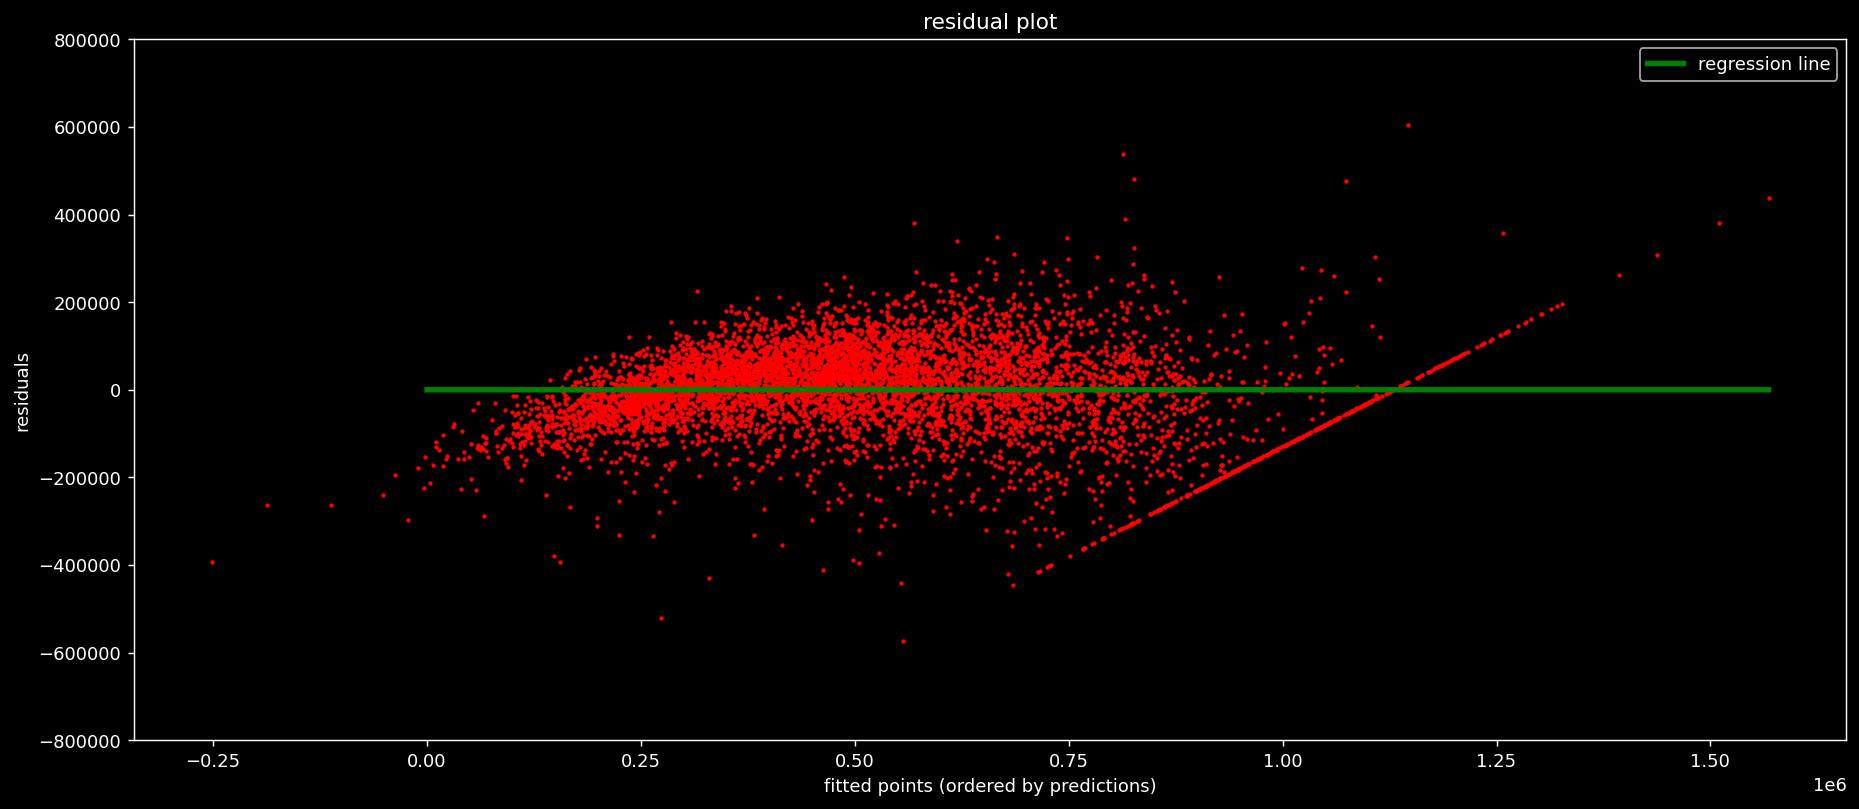

In [ ]:
plt.figure(dpi = 130, figsize = (17,7))

plt.scatter( residual_table['predictions'], residual_table['residuals'], color = 'red', s = 2)
plt.plot(z, k, color = 'green', linewidth = 3, label = 'regression line')
plt.ylim(-800000, 800000)
plt.xlabel('fitted points (ordered by predictions)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

#**Distribution of errors**

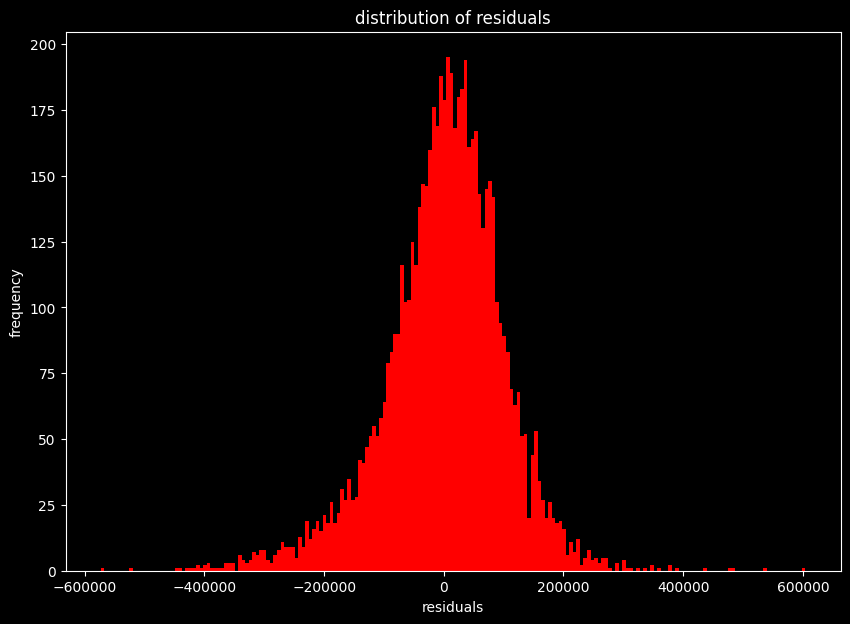

In [ ]:
plt.figure(dpi = 100, figsize = (10,7))
plt.hist(residual_table['residuals'], color = 'red', bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

#**Model Coefficients**

In [ ]:

import pandas as pd

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

#
coefficients_table = pd.DataFrame({
    'columns': X_train_scaled_df.columns,
    'coefficients': lr.coef_
})

# Sort the table by coefficients
coefficients_table_sorted = coefficients_table.sort_values(by='coefficients')

# Display the sorted coefficients table
coefficients_table_sorted


,columns,coefficients
8,Longitude,-26600.323411
30,House_age_old,-11667.580168
10,Years Since Renovation,-10048.480154
0,No of Bedrooms,-8333.605544
32,luxury_home,-2138.722690
3,No of Floors,-2089.483699
9,Lot Area after Renovation (in Sqft),-1001.292846
29,House_age_new,2519.743975
14,Condition_of_the_House_Okay,2559.207445
31,House_age_very old,10438.955657


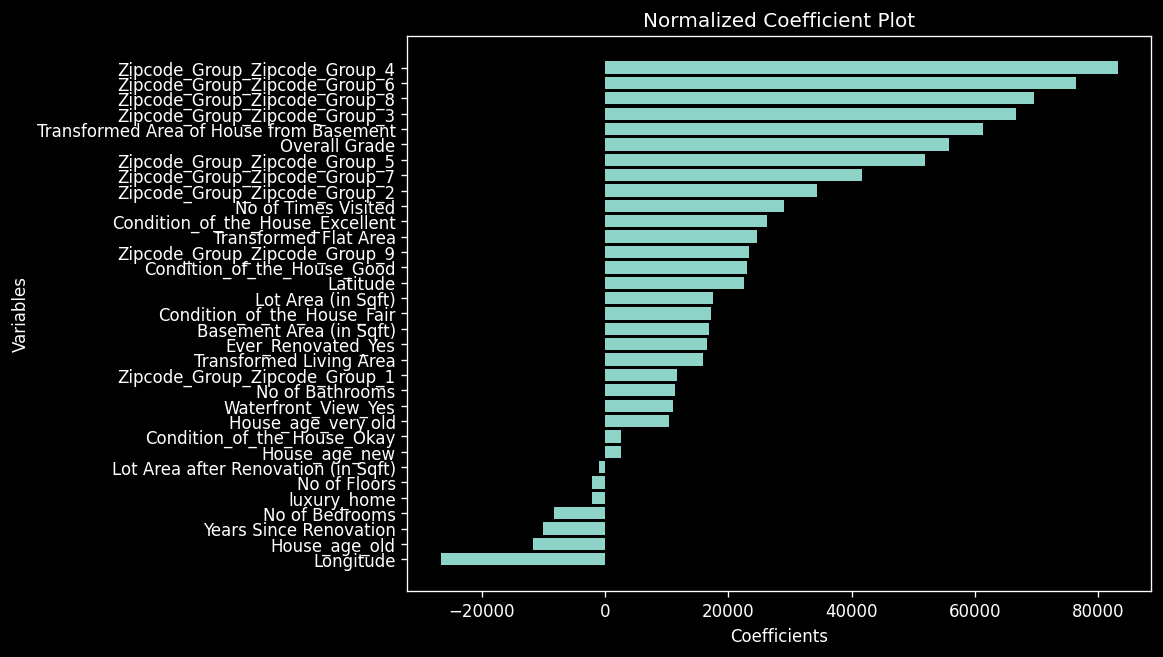

In [ ]:
import matplotlib.pyplot as plt

# Ensure you are using the sorted DataFrame
x = coefficients_table_sorted['columns']
y = coefficients_table_sorted['coefficients']

plt.figure(figsize=(8, 6), dpi=120)
plt.barh(x, y)
plt.xlabel("Coefficients")
plt.ylabel("Variables")
plt.title("Normalized Coefficient Plot")
plt.show()
